##### Copyright 2018 The TensorFlow Authors.

In [2]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [3]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Basic classification: Classify images of clothing
## Kernel: AI-ML Packages



<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [4]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.10.0


## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and [load the Fashion MNIST data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directly from TensorFlow:

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [7]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [8]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [10]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [11]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

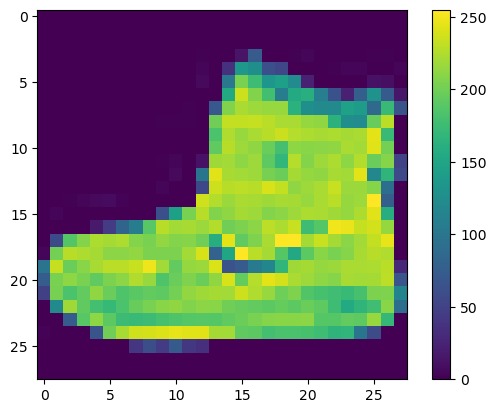

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [13]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

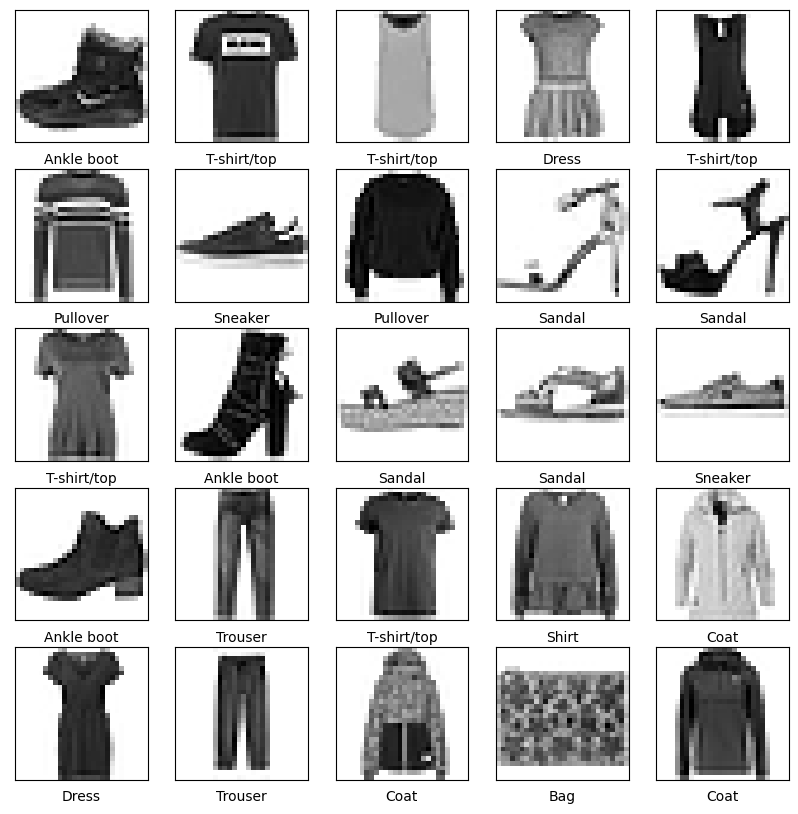

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

2024-01-30 23:08:32.810329: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-30 23:08:32.811160: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) step:

* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.
* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

In [17]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4931 - accuracy: 0.8274
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.3722 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3360 - accuracy: 0.8785
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3133 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2974 - accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2830 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2681 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2581 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2491 - accuracy: 0.9062
Epoch 10/10
1875/1875 [==============================] - 28s 15m

  95/1875 [>.............................] - ETA: 3s - loss: 0.9888 - accuracy: 0.6589

 119/1875 [>.............................] - ETA: 3s - loss: 0.9267 - accuracy: 0.6775

 143/1875 [=>............................] - ETA: 3s - loss: 0.8744 - accuracy: 0.6941

 167/1875 [=>............................] - ETA: 3s - loss: 0.8389 - accuracy: 0.7043

 191/1875 [==>...........................] - ETA: 3s - loss: 0.8115 - accuracy: 0.7129

 216/1875 [==>...........................] - ETA: 3s - loss: 0.7832 - accuracy: 0.7251

 241/1875 [==>...........................] - ETA: 3s - loss: 0.7632 - accuracy: 0.7305

 265/1875 [===>..........................] - ETA: 3s - loss: 0.7516 - accuracy: 0.7358

 290/1875 [===>..........................] - ETA: 3s - loss: 0.7362 - accuracy: 0.7413

 314/1875 [====>.........................] - ETA: 3s - loss: 0.7193 - accuracy: 0.7482

 338/1875 [====>.........................] - ETA: 3s - loss: 0.7043 - accuracy: 0.7540

 361/1875 [====>.........................] - ETA: 3s - loss: 0.6944 - accuracy: 0.7568

 384/1875 [=====>........................] - ETA: 3s - loss: 0.6810 - accuracy: 0.7618

 408/1875 [=====>........................] - ETA: 3s - loss: 0.6702 - accuracy: 0.7659

 431/1875 [=====>........................] - ETA: 3s - loss: 0.6617 - accuracy: 0.7691

 455/1875 [======>.......................] - ETA: 3s - loss: 0.6546 - accuracy: 0.7716

 479/1875 [======>.......................] - ETA: 2s - loss: 0.6485 - accuracy: 0.7736

 502/1875 [=======>......................] - ETA: 2s - loss: 0.6440 - accuracy: 0.7753

 525/1875 [=======>......................] - ETA: 2s - loss: 0.6362 - accuracy: 0.7779

 548/1875 [=======>......................] - ETA: 2s - loss: 0.6314 - accuracy: 0.7793

 571/1875 [========>.....................] - ETA: 2s - loss: 0.6264 - accuracy: 0.7804

 594/1875 [========>.....................] - ETA: 2s - loss: 0.6218 - accuracy: 0.7825

 617/1875 [========>.....................] - ETA: 2s - loss: 0.6166 - accuracy: 0.7841

 640/1875 [=========>....................] - ETA: 2s - loss: 0.6115 - accuracy: 0.7858

 664/1875 [=========>....................] - ETA: 2s - loss: 0.6077 - accuracy: 0.7871

 688/1875 [==========>...................] - ETA: 2s - loss: 0.6038 - accuracy: 0.7883

 713/1875 [==========>...................] - ETA: 2s - loss: 0.5991 - accuracy: 0.7898

 737/1875 [==========>...................] - ETA: 2s - loss: 0.5970 - accuracy: 0.7908

 762/1875 [===========>..................] - ETA: 2s - loss: 0.5920 - accuracy: 0.7927

 785/1875 [===========>..................] - ETA: 2s - loss: 0.5884 - accuracy: 0.7943

 809/1875 [===========>..................] - ETA: 2s - loss: 0.5849 - accuracy: 0.7953

 833/1875 [============>.................] - ETA: 2s - loss: 0.5809 - accuracy: 0.7969

 857/1875 [============>.................] - ETA: 2s - loss: 0.5771 - accuracy: 0.7981

 881/1875 [=============>................] - ETA: 2s - loss: 0.5728 - accuracy: 0.7996

 905/1875 [=============>................] - ETA: 2s - loss: 0.5704 - accuracy: 0.8003

 929/1875 [=============>................] - ETA: 2s - loss: 0.5669 - accuracy: 0.8013

 952/1875 [==============>...............] - ETA: 1s - loss: 0.5641 - accuracy: 0.8021

 976/1875 [==============>...............] - ETA: 1s - loss: 0.5604 - accuracy: 0.8034

1000/1875 [===============>..............] - ETA: 1s - loss: 0.5588 - accuracy: 0.8041

1024/1875 [===============>..............] - ETA: 1s - loss: 0.5559 - accuracy: 0.8050

1049/1875 [===============>..............] - ETA: 1s - loss: 0.5543 - accuracy: 0.8058

1073/1875 [================>.............] - ETA: 1s - loss: 0.5532 - accuracy: 0.8059

1097/1875 [================>.............] - ETA: 1s - loss: 0.5509 - accuracy: 0.8065

1121/1875 [================>.............] - ETA: 1s - loss: 0.5493 - accuracy: 0.8071

1146/1875 [=================>............] - ETA: 1s - loss: 0.5474 - accuracy: 0.8076

1170/1875 [=================>............] - ETA: 1s - loss: 0.5461 - accuracy: 0.8080

1194/1875 [==================>...........] - ETA: 1s - loss: 0.5441 - accuracy: 0.8087

1218/1875 [==================>...........] - ETA: 1s - loss: 0.5426 - accuracy: 0.8093

1241/1875 [==================>...........] - ETA: 1s - loss: 0.5403 - accuracy: 0.8101

1264/1875 [===================>..........] - ETA: 1s - loss: 0.5393 - accuracy: 0.8103

1287/1875 [===================>..........] - ETA: 1s - loss: 0.5377 - accuracy: 0.8106

1311/1875 [===================>..........] - ETA: 1s - loss: 0.5360 - accuracy: 0.8111

1335/1875 [====================>.........] - ETA: 1s - loss: 0.5335 - accuracy: 0.8118

1359/1875 [====================>.........] - ETA: 1s - loss: 0.5319 - accuracy: 0.8123

1383/1875 [=====================>........] - ETA: 1s - loss: 0.5306 - accuracy: 0.8127

1407/1875 [=====================>........] - ETA: 1s - loss: 0.5287 - accuracy: 0.8134

1431/1875 [=====================>........] - ETA: 0s - loss: 0.5263 - accuracy: 0.8144

1455/1875 [======================>.......] - ETA: 0s - loss: 0.5247 - accuracy: 0.8149

1479/1875 [======================>.......] - ETA: 0s - loss: 0.5230 - accuracy: 0.8156

1503/1875 [=======================>......] - ETA: 0s - loss: 0.5229 - accuracy: 0.8156

1527/1875 [=======================>......] - ETA: 0s - loss: 0.5213 - accuracy: 0.8162

1552/1875 [=======================>......] - ETA: 0s - loss: 0.5192 - accuracy: 0.8168

1576/1875 [========================>.....] - ETA: 0s - loss: 0.5183 - accuracy: 0.8173

1600/1875 [========================>.....] - ETA: 0s - loss: 0.5160 - accuracy: 0.8179

1624/1875 [========================>.....] - ETA: 0s - loss: 0.5153 - accuracy: 0.8182

1648/1875 [=========================>....] - ETA: 0s - loss: 0.5141 - accuracy: 0.8188

1672/1875 [=========================>....] - ETA: 0s - loss: 0.5132 - accuracy: 0.8191

1697/1875 [==========================>...] - ETA: 0s - loss: 0.5116 - accuracy: 0.8197

1722/1875 [==========================>...] - ETA: 0s - loss: 0.5105 - accuracy: 0.8202

1745/1875 [==========================>...] - ETA: 0s - loss: 0.5093 - accuracy: 0.8205

1769/1875 [===========================>..] - ETA: 0s - loss: 0.5082 - accuracy: 0.8210

1793/1875 [===========================>..] - ETA: 0s - loss: 0.5072 - accuracy: 0.8212

1817/1875 [============================>.] - ETA: 0s - loss: 0.5056 - accuracy: 0.8219

1841/1875 [============================>.] - ETA: 0s - loss: 0.5040 - accuracy: 0.8223

1866/1875 [============================>.] - ETA: 0s - loss: 0.5026 - accuracy: 0.8227

1875/1875 [==============================] - 5s 2ms/step - loss: 0.5025 - accuracy: 0.8227


Epoch 2/10


   1/1875 [..............................] - ETA: 5s - loss: 0.3298 - accuracy: 0.9062

  25/1875 [..............................] - ETA: 3s - loss: 0.4358 - accuracy: 0.8388

  50/1875 [..............................] - ETA: 3s - loss: 0.4353 - accuracy: 0.8531

  74/1875 [>.............................] - ETA: 3s - loss: 0.4335 - accuracy: 0.8530

  98/1875 [>.............................] - ETA: 3s - loss: 0.4095 - accuracy: 0.8600

 123/1875 [>.............................] - ETA: 3s - loss: 0.3971 - accuracy: 0.8631

 147/1875 [=>............................] - ETA: 3s - loss: 0.4009 - accuracy: 0.8599

 172/1875 [=>............................] - ETA: 3s - loss: 0.4057 - accuracy: 0.8596

 197/1875 [==>...........................] - ETA: 3s - loss: 0.4066 - accuracy: 0.8590

 221/1875 [==>...........................] - ETA: 3s - loss: 0.4068 - accuracy: 0.8585

 245/1875 [==>...........................] - ETA: 3s - loss: 0.4029 - accuracy: 0.8598

 269/1875 [===>..........................] - ETA: 3s - loss: 0.4017 - accuracy: 0.8595

 294/1875 [===>..........................] - ETA: 3s - loss: 0.3962 - accuracy: 0.8614

 319/1875 [====>.........................] - ETA: 3s - loss: 0.3969 - accuracy: 0.8611

 344/1875 [====>.........................] - ETA: 3s - loss: 0.3949 - accuracy: 0.8605

 369/1875 [====>.........................] - ETA: 3s - loss: 0.3979 - accuracy: 0.8598

 393/1875 [=====>........................] - ETA: 3s - loss: 0.3979 - accuracy: 0.8593

 417/1875 [=====>........................] - ETA: 3s - loss: 0.3977 - accuracy: 0.8594

 441/1875 [======>.......................] - ETA: 2s - loss: 0.3946 - accuracy: 0.8598

 465/1875 [======>.......................] - ETA: 2s - loss: 0.3950 - accuracy: 0.8599

 489/1875 [======>.......................] - ETA: 2s - loss: 0.3924 - accuracy: 0.8607

 512/1875 [=======>......................] - ETA: 2s - loss: 0.3913 - accuracy: 0.8609

 535/1875 [=======>......................] - ETA: 2s - loss: 0.3932 - accuracy: 0.8604

 559/1875 [=======>......................] - ETA: 2s - loss: 0.3935 - accuracy: 0.8600

 582/1875 [========>.....................] - ETA: 2s - loss: 0.3943 - accuracy: 0.8593

 606/1875 [========>.....................] - ETA: 2s - loss: 0.3950 - accuracy: 0.8589

 630/1875 [=========>....................] - ETA: 2s - loss: 0.3937 - accuracy: 0.8593

 654/1875 [=========>....................] - ETA: 2s - loss: 0.3921 - accuracy: 0.8597

 678/1875 [=========>....................] - ETA: 2s - loss: 0.3928 - accuracy: 0.8591

 702/1875 [==========>...................] - ETA: 2s - loss: 0.3927 - accuracy: 0.8591

 725/1875 [==========>...................] - ETA: 2s - loss: 0.3922 - accuracy: 0.8592

 749/1875 [==========>...................] - ETA: 2s - loss: 0.3923 - accuracy: 0.8597

 773/1875 [===========>..................] - ETA: 2s - loss: 0.3907 - accuracy: 0.8602

 796/1875 [===========>..................] - ETA: 2s - loss: 0.3900 - accuracy: 0.8607

 820/1875 [============>.................] - ETA: 2s - loss: 0.3896 - accuracy: 0.8610

 844/1875 [============>.................] - ETA: 2s - loss: 0.3904 - accuracy: 0.8608

 868/1875 [============>.................] - ETA: 2s - loss: 0.3900 - accuracy: 0.8607

 892/1875 [=============>................] - ETA: 2s - loss: 0.3889 - accuracy: 0.8612

 917/1875 [=============>................] - ETA: 2s - loss: 0.3891 - accuracy: 0.8612

 941/1875 [==============>...............] - ETA: 1s - loss: 0.3892 - accuracy: 0.8614

 965/1875 [==============>...............] - ETA: 1s - loss: 0.3892 - accuracy: 0.8609

 988/1875 [==============>...............] - ETA: 1s - loss: 0.3895 - accuracy: 0.8604

1011/1875 [===============>..............] - ETA: 1s - loss: 0.3892 - accuracy: 0.8607

1035/1875 [===============>..............] - ETA: 1s - loss: 0.3892 - accuracy: 0.8606

1060/1875 [===============>..............] - ETA: 1s - loss: 0.3894 - accuracy: 0.8604

1085/1875 [================>.............] - ETA: 1s - loss: 0.3885 - accuracy: 0.8608

1110/1875 [================>.............] - ETA: 1s - loss: 0.3880 - accuracy: 0.8608

1134/1875 [=================>............] - ETA: 1s - loss: 0.3881 - accuracy: 0.8608

1158/1875 [=================>............] - ETA: 1s - loss: 0.3883 - accuracy: 0.8606

1182/1875 [=================>............] - ETA: 1s - loss: 0.3883 - accuracy: 0.8605

1204/1875 [==================>...........] - ETA: 1s - loss: 0.3879 - accuracy: 0.8608

1227/1875 [==================>...........] - ETA: 1s - loss: 0.3878 - accuracy: 0.8606

1250/1875 [===================>..........] - ETA: 1s - loss: 0.3879 - accuracy: 0.8606

1274/1875 [===================>..........] - ETA: 1s - loss: 0.3876 - accuracy: 0.8607

1298/1875 [===================>..........] - ETA: 1s - loss: 0.3877 - accuracy: 0.8607

1322/1875 [====================>.........] - ETA: 1s - loss: 0.3869 - accuracy: 0.8608

1346/1875 [====================>.........] - ETA: 1s - loss: 0.3861 - accuracy: 0.8611

1370/1875 [====================>.........] - ETA: 1s - loss: 0.3860 - accuracy: 0.8613

1395/1875 [=====================>........] - ETA: 1s - loss: 0.3863 - accuracy: 0.8612

1419/1875 [=====================>........] - ETA: 0s - loss: 0.3862 - accuracy: 0.8615

1443/1875 [======================>.......] - ETA: 0s - loss: 0.3863 - accuracy: 0.8615

1467/1875 [======================>.......] - ETA: 0s - loss: 0.3863 - accuracy: 0.8614

1491/1875 [======================>.......] - ETA: 0s - loss: 0.3862 - accuracy: 0.8615

1514/1875 [=======================>......] - ETA: 0s - loss: 0.3859 - accuracy: 0.8615

1537/1875 [=======================>......] - ETA: 0s - loss: 0.3851 - accuracy: 0.8616

1561/1875 [=======================>......] - ETA: 0s - loss: 0.3847 - accuracy: 0.8617

1585/1875 [========================>.....] - ETA: 0s - loss: 0.3846 - accuracy: 0.8619

1610/1875 [========================>.....] - ETA: 0s - loss: 0.3846 - accuracy: 0.8617

1635/1875 [=========================>....] - ETA: 0s - loss: 0.3851 - accuracy: 0.8613

1660/1875 [=========================>....] - ETA: 0s - loss: 0.3842 - accuracy: 0.8617

1685/1875 [=========================>....] - ETA: 0s - loss: 0.3839 - accuracy: 0.8621

1710/1875 [==========================>...] - ETA: 0s - loss: 0.3836 - accuracy: 0.8622

1734/1875 [==========================>...] - ETA: 0s - loss: 0.3836 - accuracy: 0.8623

1758/1875 [===========================>..] - ETA: 0s - loss: 0.3833 - accuracy: 0.8625

1783/1875 [===========================>..] - ETA: 0s - loss: 0.3831 - accuracy: 0.8626

1808/1875 [===========================>..] - ETA: 0s - loss: 0.3827 - accuracy: 0.8628

1833/1875 [============================>.] - ETA: 0s - loss: 0.3824 - accuracy: 0.8629

1858/1875 [============================>.] - ETA: 0s - loss: 0.3816 - accuracy: 0.8632

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3817 - accuracy: 0.8631


Epoch 3/10


   1/1875 [..............................] - ETA: 5s - loss: 0.1791 - accuracy: 0.9375

  26/1875 [..............................] - ETA: 3s - loss: 0.3153 - accuracy: 0.8846

  51/1875 [..............................] - ETA: 3s - loss: 0.3129 - accuracy: 0.8891

  76/1875 [>.............................] - ETA: 3s - loss: 0.3087 - accuracy: 0.8873

 101/1875 [>.............................] - ETA: 3s - loss: 0.3149 - accuracy: 0.8871

 125/1875 [=>............................] - ETA: 3s - loss: 0.3258 - accuracy: 0.8825

 149/1875 [=>............................] - ETA: 3s - loss: 0.3265 - accuracy: 0.8817

 173/1875 [=>............................] - ETA: 3s - loss: 0.3213 - accuracy: 0.8840

 197/1875 [==>...........................] - ETA: 3s - loss: 0.3303 - accuracy: 0.8798

 221/1875 [==>...........................] - ETA: 3s - loss: 0.3349 - accuracy: 0.8778

 245/1875 [==>...........................] - ETA: 3s - loss: 0.3376 - accuracy: 0.8770

 269/1875 [===>..........................] - ETA: 3s - loss: 0.3380 - accuracy: 0.8776

 294/1875 [===>..........................] - ETA: 3s - loss: 0.3415 - accuracy: 0.8760

 318/1875 [====>.........................] - ETA: 3s - loss: 0.3418 - accuracy: 0.8764

 342/1875 [====>.........................] - ETA: 3s - loss: 0.3415 - accuracy: 0.8757

 367/1875 [====>.........................] - ETA: 3s - loss: 0.3402 - accuracy: 0.8770

 392/1875 [=====>........................] - ETA: 3s - loss: 0.3401 - accuracy: 0.8777

 416/1875 [=====>........................] - ETA: 3s - loss: 0.3405 - accuracy: 0.8774

 441/1875 [======>.......................] - ETA: 2s - loss: 0.3407 - accuracy: 0.8772

 465/1875 [======>.......................] - ETA: 2s - loss: 0.3400 - accuracy: 0.8768

 490/1875 [======>.......................] - ETA: 2s - loss: 0.3388 - accuracy: 0.8771

 515/1875 [=======>......................] - ETA: 2s - loss: 0.3391 - accuracy: 0.8767

 540/1875 [=======>......................] - ETA: 2s - loss: 0.3378 - accuracy: 0.8767

 565/1875 [========>.....................] - ETA: 2s - loss: 0.3357 - accuracy: 0.8774

 589/1875 [========>.....................] - ETA: 2s - loss: 0.3359 - accuracy: 0.8774

 613/1875 [========>.....................] - ETA: 2s - loss: 0.3350 - accuracy: 0.8774

 637/1875 [=========>....................] - ETA: 2s - loss: 0.3353 - accuracy: 0.8773

 661/1875 [=========>....................] - ETA: 2s - loss: 0.3346 - accuracy: 0.8773

 685/1875 [=========>....................] - ETA: 2s - loss: 0.3344 - accuracy: 0.8774

 709/1875 [==========>...................] - ETA: 2s - loss: 0.3367 - accuracy: 0.8765

 733/1875 [==========>...................] - ETA: 2s - loss: 0.3398 - accuracy: 0.8755

 757/1875 [===========>..................] - ETA: 2s - loss: 0.3392 - accuracy: 0.8756

 781/1875 [===========>..................] - ETA: 2s - loss: 0.3386 - accuracy: 0.8756

 805/1875 [===========>..................] - ETA: 2s - loss: 0.3391 - accuracy: 0.8751

 829/1875 [============>.................] - ETA: 2s - loss: 0.3402 - accuracy: 0.8747

 853/1875 [============>.................] - ETA: 2s - loss: 0.3400 - accuracy: 0.8749

 877/1875 [=============>................] - ETA: 2s - loss: 0.3402 - accuracy: 0.8749

 901/1875 [=============>................] - ETA: 2s - loss: 0.3407 - accuracy: 0.8751

 925/1875 [=============>................] - ETA: 1s - loss: 0.3403 - accuracy: 0.8750

 950/1875 [==============>...............] - ETA: 1s - loss: 0.3396 - accuracy: 0.8750

 975/1875 [==============>...............] - ETA: 1s - loss: 0.3391 - accuracy: 0.8754

 999/1875 [==============>...............] - ETA: 1s - loss: 0.3380 - accuracy: 0.8760

1023/1875 [===============>..............] - ETA: 1s - loss: 0.3382 - accuracy: 0.8759

1047/1875 [===============>..............] - ETA: 1s - loss: 0.3391 - accuracy: 0.8754

1071/1875 [================>.............] - ETA: 1s - loss: 0.3398 - accuracy: 0.8749

1096/1875 [================>.............] - ETA: 1s - loss: 0.3403 - accuracy: 0.8747

1120/1875 [================>.............] - ETA: 1s - loss: 0.3401 - accuracy: 0.8747

1145/1875 [=================>............] - ETA: 1s - loss: 0.3403 - accuracy: 0.8746

1169/1875 [=================>............] - ETA: 1s - loss: 0.3403 - accuracy: 0.8744

1194/1875 [==================>...........] - ETA: 1s - loss: 0.3403 - accuracy: 0.8745

1218/1875 [==================>...........] - ETA: 1s - loss: 0.3400 - accuracy: 0.8744

1242/1875 [==================>...........] - ETA: 1s - loss: 0.3395 - accuracy: 0.8744

1266/1875 [===================>..........] - ETA: 1s - loss: 0.3398 - accuracy: 0.8745

1290/1875 [===================>..........] - ETA: 1s - loss: 0.3393 - accuracy: 0.8747

1314/1875 [====================>.........] - ETA: 1s - loss: 0.3397 - accuracy: 0.8745

1338/1875 [====================>.........] - ETA: 1s - loss: 0.3396 - accuracy: 0.8747

1363/1875 [====================>.........] - ETA: 1s - loss: 0.3401 - accuracy: 0.8749

1388/1875 [=====================>........] - ETA: 1s - loss: 0.3398 - accuracy: 0.8750

1412/1875 [=====================>........] - ETA: 0s - loss: 0.3404 - accuracy: 0.8749

1436/1875 [=====================>........] - ETA: 0s - loss: 0.3404 - accuracy: 0.8751

1461/1875 [======================>.......] - ETA: 0s - loss: 0.3412 - accuracy: 0.8749

1486/1875 [======================>.......] - ETA: 0s - loss: 0.3408 - accuracy: 0.8752

1511/1875 [=======================>......] - ETA: 0s - loss: 0.3409 - accuracy: 0.8754

1536/1875 [=======================>......] - ETA: 0s - loss: 0.3407 - accuracy: 0.8754

1561/1875 [=======================>......] - ETA: 0s - loss: 0.3406 - accuracy: 0.8755

1586/1875 [========================>.....] - ETA: 0s - loss: 0.3393 - accuracy: 0.8760

1611/1875 [========================>.....] - ETA: 0s - loss: 0.3390 - accuracy: 0.8760

1635/1875 [=========================>....] - ETA: 0s - loss: 0.3388 - accuracy: 0.8760

1660/1875 [=========================>....] - ETA: 0s - loss: 0.3389 - accuracy: 0.8761

1684/1875 [=========================>....] - ETA: 0s - loss: 0.3389 - accuracy: 0.8762

1708/1875 [==========================>...] - ETA: 0s - loss: 0.3392 - accuracy: 0.8761

1731/1875 [==========================>...] - ETA: 0s - loss: 0.3384 - accuracy: 0.8763

1755/1875 [===========================>..] - ETA: 0s - loss: 0.3388 - accuracy: 0.8761

1778/1875 [===========================>..] - ETA: 0s - loss: 0.3389 - accuracy: 0.8759

1801/1875 [===========================>..] - ETA: 0s - loss: 0.3389 - accuracy: 0.8759

1825/1875 [============================>.] - ETA: 0s - loss: 0.3383 - accuracy: 0.8761

1849/1875 [============================>.] - ETA: 0s - loss: 0.3390 - accuracy: 0.8758

1873/1875 [============================>.] - ETA: 0s - loss: 0.3391 - accuracy: 0.8757

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3391 - accuracy: 0.8756


Epoch 4/10


   1/1875 [..............................] - ETA: 5s - loss: 0.5232 - accuracy: 0.7812

  26/1875 [..............................] - ETA: 3s - loss: 0.3257 - accuracy: 0.8774

  51/1875 [..............................] - ETA: 3s - loss: 0.3104 - accuracy: 0.8817

  76/1875 [>.............................] - ETA: 3s - loss: 0.3052 - accuracy: 0.8857

 100/1875 [>.............................] - ETA: 3s - loss: 0.3002 - accuracy: 0.8894

 124/1875 [>.............................] - ETA: 3s - loss: 0.3003 - accuracy: 0.8894

 147/1875 [=>............................] - ETA: 3s - loss: 0.3061 - accuracy: 0.8863

 171/1875 [=>............................] - ETA: 3s - loss: 0.3034 - accuracy: 0.8887

 196/1875 [==>...........................] - ETA: 3s - loss: 0.3046 - accuracy: 0.8881

 220/1875 [==>...........................] - ETA: 3s - loss: 0.3093 - accuracy: 0.8864

 244/1875 [==>...........................] - ETA: 3s - loss: 0.3121 - accuracy: 0.8842

 269/1875 [===>..........................] - ETA: 3s - loss: 0.3148 - accuracy: 0.8821

 294/1875 [===>..........................] - ETA: 3s - loss: 0.3149 - accuracy: 0.8823

 317/1875 [====>.........................] - ETA: 3s - loss: 0.3138 - accuracy: 0.8833

 342/1875 [====>.........................] - ETA: 3s - loss: 0.3137 - accuracy: 0.8838

 367/1875 [====>.........................] - ETA: 3s - loss: 0.3130 - accuracy: 0.8845

 392/1875 [=====>........................] - ETA: 3s - loss: 0.3132 - accuracy: 0.8846

 416/1875 [=====>........................] - ETA: 3s - loss: 0.3140 - accuracy: 0.8844

 441/1875 [======>.......................] - ETA: 3s - loss: 0.3155 - accuracy: 0.8844

 465/1875 [======>.......................] - ETA: 2s - loss: 0.3152 - accuracy: 0.8843

 490/1875 [======>.......................] - ETA: 2s - loss: 0.3134 - accuracy: 0.8853

 516/1875 [=======>......................] - ETA: 2s - loss: 0.3137 - accuracy: 0.8854

 541/1875 [=======>......................] - ETA: 2s - loss: 0.3140 - accuracy: 0.8851

 565/1875 [========>.....................] - ETA: 2s - loss: 0.3138 - accuracy: 0.8850

 589/1875 [========>.....................] - ETA: 2s - loss: 0.3149 - accuracy: 0.8848

 613/1875 [========>.....................] - ETA: 2s - loss: 0.3134 - accuracy: 0.8856

 637/1875 [=========>....................] - ETA: 2s - loss: 0.3135 - accuracy: 0.8856

 661/1875 [=========>....................] - ETA: 2s - loss: 0.3136 - accuracy: 0.8857

 686/1875 [=========>....................] - ETA: 2s - loss: 0.3119 - accuracy: 0.8861

 711/1875 [==========>...................] - ETA: 2s - loss: 0.3134 - accuracy: 0.8858

 736/1875 [==========>...................] - ETA: 2s - loss: 0.3143 - accuracy: 0.8857

 761/1875 [===========>..................] - ETA: 2s - loss: 0.3147 - accuracy: 0.8859

 785/1875 [===========>..................] - ETA: 2s - loss: 0.3133 - accuracy: 0.8866

 809/1875 [===========>..................] - ETA: 2s - loss: 0.3147 - accuracy: 0.8861

 833/1875 [============>.................] - ETA: 2s - loss: 0.3133 - accuracy: 0.8862

 858/1875 [============>.................] - ETA: 2s - loss: 0.3134 - accuracy: 0.8862

 883/1875 [=============>................] - ETA: 2s - loss: 0.3136 - accuracy: 0.8860

 907/1875 [=============>................] - ETA: 2s - loss: 0.3132 - accuracy: 0.8864

 932/1875 [=============>................] - ETA: 1s - loss: 0.3136 - accuracy: 0.8863

 957/1875 [==============>...............] - ETA: 1s - loss: 0.3151 - accuracy: 0.8856

 982/1875 [==============>...............] - ETA: 1s - loss: 0.3149 - accuracy: 0.8857

1007/1875 [===============>..............] - ETA: 1s - loss: 0.3146 - accuracy: 0.8857

1031/1875 [===============>..............] - ETA: 1s - loss: 0.3142 - accuracy: 0.8861

1055/1875 [===============>..............] - ETA: 1s - loss: 0.3145 - accuracy: 0.8860

1079/1875 [================>.............] - ETA: 1s - loss: 0.3145 - accuracy: 0.8859

1103/1875 [================>.............] - ETA: 1s - loss: 0.3143 - accuracy: 0.8860

1127/1875 [=================>............] - ETA: 1s - loss: 0.3145 - accuracy: 0.8856

1151/1875 [=================>............] - ETA: 1s - loss: 0.3142 - accuracy: 0.8854

1176/1875 [=================>............] - ETA: 1s - loss: 0.3154 - accuracy: 0.8849

1200/1875 [==================>...........] - ETA: 1s - loss: 0.3147 - accuracy: 0.8851

1225/1875 [==================>...........] - ETA: 1s - loss: 0.3150 - accuracy: 0.8851

1250/1875 [===================>..........] - ETA: 1s - loss: 0.3150 - accuracy: 0.8850

1275/1875 [===================>..........] - ETA: 1s - loss: 0.3165 - accuracy: 0.8847

1300/1875 [===================>..........] - ETA: 1s - loss: 0.3169 - accuracy: 0.8842

1325/1875 [====================>.........] - ETA: 1s - loss: 0.3167 - accuracy: 0.8843

1349/1875 [====================>.........] - ETA: 1s - loss: 0.3165 - accuracy: 0.8843

1374/1875 [====================>.........] - ETA: 1s - loss: 0.3163 - accuracy: 0.8844

1399/1875 [=====================>........] - ETA: 0s - loss: 0.3164 - accuracy: 0.8843

1424/1875 [=====================>........] - ETA: 0s - loss: 0.3164 - accuracy: 0.8843

1449/1875 [======================>.......] - ETA: 0s - loss: 0.3165 - accuracy: 0.8843

1474/1875 [======================>.......] - ETA: 0s - loss: 0.3167 - accuracy: 0.8845

1499/1875 [======================>.......] - ETA: 0s - loss: 0.3171 - accuracy: 0.8842

1524/1875 [=======================>......] - ETA: 0s - loss: 0.3166 - accuracy: 0.8845

1549/1875 [=======================>......] - ETA: 0s - loss: 0.3169 - accuracy: 0.8842

1574/1875 [========================>.....] - ETA: 0s - loss: 0.3171 - accuracy: 0.8840

1600/1875 [========================>.....] - ETA: 0s - loss: 0.3169 - accuracy: 0.8843

1625/1875 [=========================>....] - ETA: 0s - loss: 0.3168 - accuracy: 0.8844

1650/1875 [=========================>....] - ETA: 0s - loss: 0.3170 - accuracy: 0.8843

1675/1875 [=========================>....] - ETA: 0s - loss: 0.3167 - accuracy: 0.8843

1700/1875 [==========================>...] - ETA: 0s - loss: 0.3168 - accuracy: 0.8843

1725/1875 [==========================>...] - ETA: 0s - loss: 0.3167 - accuracy: 0.8845

1749/1875 [==========================>...] - ETA: 0s - loss: 0.3164 - accuracy: 0.8846

1773/1875 [===========================>..] - ETA: 0s - loss: 0.3161 - accuracy: 0.8845

1798/1875 [===========================>..] - ETA: 0s - loss: 0.3160 - accuracy: 0.8845

1824/1875 [============================>.] - ETA: 0s - loss: 0.3155 - accuracy: 0.8847

1849/1875 [============================>.] - ETA: 0s - loss: 0.3148 - accuracy: 0.8851

1875/1875 [==============================] - ETA: 0s - loss: 0.3152 - accuracy: 0.8850

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3152 - accuracy: 0.8850


Epoch 5/10


   1/1875 [..............................] - ETA: 4s - loss: 0.1817 - accuracy: 0.9062

  27/1875 [..............................] - ETA: 3s - loss: 0.2726 - accuracy: 0.8970

  52/1875 [..............................] - ETA: 3s - loss: 0.2878 - accuracy: 0.8918

  77/1875 [>.............................] - ETA: 3s - loss: 0.2902 - accuracy: 0.8941

 102/1875 [>.............................] - ETA: 3s - loss: 0.2936 - accuracy: 0.8946

 127/1875 [=>............................] - ETA: 3s - loss: 0.2909 - accuracy: 0.8969

 152/1875 [=>............................] - ETA: 3s - loss: 0.2971 - accuracy: 0.8956

 177/1875 [=>............................] - ETA: 3s - loss: 0.2917 - accuracy: 0.8958

 202/1875 [==>...........................] - ETA: 3s - loss: 0.2937 - accuracy: 0.8953

 227/1875 [==>...........................] - ETA: 3s - loss: 0.2878 - accuracy: 0.8970

 252/1875 [===>..........................] - ETA: 3s - loss: 0.2895 - accuracy: 0.8957

 277/1875 [===>..........................] - ETA: 3s - loss: 0.2855 - accuracy: 0.8973

 302/1875 [===>..........................] - ETA: 3s - loss: 0.2853 - accuracy: 0.8971

 327/1875 [====>.........................] - ETA: 3s - loss: 0.2883 - accuracy: 0.8962

 352/1875 [====>.........................] - ETA: 3s - loss: 0.2919 - accuracy: 0.8941

 376/1875 [=====>........................] - ETA: 3s - loss: 0.2899 - accuracy: 0.8944

 401/1875 [=====>........................] - ETA: 3s - loss: 0.2904 - accuracy: 0.8941

 426/1875 [=====>........................] - ETA: 2s - loss: 0.2913 - accuracy: 0.8937

 451/1875 [======>.......................] - ETA: 2s - loss: 0.2932 - accuracy: 0.8931

 476/1875 [======>.......................] - ETA: 2s - loss: 0.2933 - accuracy: 0.8929

 501/1875 [=======>......................] - ETA: 2s - loss: 0.2930 - accuracy: 0.8926

 526/1875 [=======>......................] - ETA: 2s - loss: 0.2959 - accuracy: 0.8915

 551/1875 [=======>......................] - ETA: 2s - loss: 0.2987 - accuracy: 0.8913

 576/1875 [========>.....................] - ETA: 2s - loss: 0.2991 - accuracy: 0.8912

 601/1875 [========>.....................] - ETA: 2s - loss: 0.3000 - accuracy: 0.8904

 626/1875 [=========>....................] - ETA: 2s - loss: 0.3004 - accuracy: 0.8903

 651/1875 [=========>....................] - ETA: 2s - loss: 0.2985 - accuracy: 0.8910

 675/1875 [=========>....................] - ETA: 2s - loss: 0.2986 - accuracy: 0.8909

 700/1875 [==========>...................] - ETA: 2s - loss: 0.2978 - accuracy: 0.8910

 726/1875 [==========>...................] - ETA: 2s - loss: 0.2973 - accuracy: 0.8908

 753/1875 [===========>..................] - ETA: 2s - loss: 0.2975 - accuracy: 0.8906

 778/1875 [===========>..................] - ETA: 2s - loss: 0.2983 - accuracy: 0.8900

 803/1875 [===========>..................] - ETA: 2s - loss: 0.2992 - accuracy: 0.8896

 828/1875 [============>.................] - ETA: 2s - loss: 0.2989 - accuracy: 0.8893

 853/1875 [============>.................] - ETA: 2s - loss: 0.2990 - accuracy: 0.8893

 878/1875 [=============>................] - ETA: 2s - loss: 0.2991 - accuracy: 0.8891

 903/1875 [=============>................] - ETA: 1s - loss: 0.2988 - accuracy: 0.8893

 928/1875 [=============>................] - ETA: 1s - loss: 0.2989 - accuracy: 0.8893

 953/1875 [==============>...............] - ETA: 1s - loss: 0.2995 - accuracy: 0.8893

 978/1875 [==============>...............] - ETA: 1s - loss: 0.3009 - accuracy: 0.8891

1003/1875 [===============>..............] - ETA: 1s - loss: 0.3020 - accuracy: 0.8887

1027/1875 [===============>..............] - ETA: 1s - loss: 0.3009 - accuracy: 0.8892

1051/1875 [===============>..............] - ETA: 1s - loss: 0.3007 - accuracy: 0.8892

1076/1875 [================>.............] - ETA: 1s - loss: 0.3008 - accuracy: 0.8894

1100/1875 [================>.............] - ETA: 1s - loss: 0.3005 - accuracy: 0.8895

1125/1875 [=================>............] - ETA: 1s - loss: 0.3000 - accuracy: 0.8897

1150/1875 [=================>............] - ETA: 1s - loss: 0.2990 - accuracy: 0.8903

1175/1875 [=================>............] - ETA: 1s - loss: 0.2984 - accuracy: 0.8907

1200/1875 [==================>...........] - ETA: 1s - loss: 0.2981 - accuracy: 0.8909

1225/1875 [==================>...........] - ETA: 1s - loss: 0.2981 - accuracy: 0.8910

1250/1875 [===================>..........] - ETA: 1s - loss: 0.2968 - accuracy: 0.8913

1275/1875 [===================>..........] - ETA: 1s - loss: 0.2975 - accuracy: 0.8912

1300/1875 [===================>..........] - ETA: 1s - loss: 0.2976 - accuracy: 0.8915

1324/1875 [====================>.........] - ETA: 1s - loss: 0.2976 - accuracy: 0.8915

1348/1875 [====================>.........] - ETA: 1s - loss: 0.2968 - accuracy: 0.8919

1372/1875 [====================>.........] - ETA: 1s - loss: 0.2978 - accuracy: 0.8916

1397/1875 [=====================>........] - ETA: 0s - loss: 0.2976 - accuracy: 0.8918

1422/1875 [=====================>........] - ETA: 0s - loss: 0.2975 - accuracy: 0.8919

1446/1875 [======================>.......] - ETA: 0s - loss: 0.2974 - accuracy: 0.8921

1470/1875 [======================>.......] - ETA: 0s - loss: 0.2973 - accuracy: 0.8920

1495/1875 [======================>.......] - ETA: 0s - loss: 0.2973 - accuracy: 0.8920

1520/1875 [=======================>......] - ETA: 0s - loss: 0.2979 - accuracy: 0.8918

1545/1875 [=======================>......] - ETA: 0s - loss: 0.2989 - accuracy: 0.8915

1570/1875 [========================>.....] - ETA: 0s - loss: 0.2985 - accuracy: 0.8917

1595/1875 [========================>.....] - ETA: 0s - loss: 0.2983 - accuracy: 0.8917

1619/1875 [========================>.....] - ETA: 0s - loss: 0.2978 - accuracy: 0.8919

1644/1875 [=========================>....] - ETA: 0s - loss: 0.2978 - accuracy: 0.8918

1669/1875 [=========================>....] - ETA: 0s - loss: 0.2970 - accuracy: 0.8922

1695/1875 [==========================>...] - ETA: 0s - loss: 0.2971 - accuracy: 0.8921

1721/1875 [==========================>...] - ETA: 0s - loss: 0.2972 - accuracy: 0.8921

1747/1875 [==========================>...] - ETA: 0s - loss: 0.2971 - accuracy: 0.8920

1772/1875 [===========================>..] - ETA: 0s - loss: 0.2969 - accuracy: 0.8921

1797/1875 [===========================>..] - ETA: 0s - loss: 0.2970 - accuracy: 0.8921

1822/1875 [============================>.] - ETA: 0s - loss: 0.2973 - accuracy: 0.8918

1847/1875 [============================>.] - ETA: 0s - loss: 0.2973 - accuracy: 0.8918

1872/1875 [============================>.] - ETA: 0s - loss: 0.2972 - accuracy: 0.8917

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2973 - accuracy: 0.8917


Epoch 6/10


   1/1875 [..............................] - ETA: 5s - loss: 0.3824 - accuracy: 0.8125

  26/1875 [..............................] - ETA: 3s - loss: 0.2775 - accuracy: 0.9002

  51/1875 [..............................] - ETA: 3s - loss: 0.2694 - accuracy: 0.9026

  76/1875 [>.............................] - ETA: 3s - loss: 0.2748 - accuracy: 0.8984

 101/1875 [>.............................] - ETA: 3s - loss: 0.2769 - accuracy: 0.9010

 126/1875 [=>............................] - ETA: 3s - loss: 0.2752 - accuracy: 0.9035

 151/1875 [=>............................] - ETA: 3s - loss: 0.2712 - accuracy: 0.9046

 176/1875 [=>............................] - ETA: 3s - loss: 0.2769 - accuracy: 0.9029

 201/1875 [==>...........................] - ETA: 3s - loss: 0.2808 - accuracy: 0.9005

 226/1875 [==>...........................] - ETA: 3s - loss: 0.2745 - accuracy: 0.9022

 251/1875 [===>..........................] - ETA: 3s - loss: 0.2722 - accuracy: 0.9028

 276/1875 [===>..........................] - ETA: 3s - loss: 0.2692 - accuracy: 0.9040

 301/1875 [===>..........................] - ETA: 3s - loss: 0.2703 - accuracy: 0.9039

 327/1875 [====>.........................] - ETA: 3s - loss: 0.2709 - accuracy: 0.9035

 352/1875 [====>.........................] - ETA: 3s - loss: 0.2696 - accuracy: 0.9041

 377/1875 [=====>........................] - ETA: 3s - loss: 0.2707 - accuracy: 0.9032

 403/1875 [=====>........................] - ETA: 2s - loss: 0.2688 - accuracy: 0.9039

 429/1875 [=====>........................] - ETA: 2s - loss: 0.2696 - accuracy: 0.9032

 455/1875 [======>.......................] - ETA: 2s - loss: 0.2711 - accuracy: 0.9031

 481/1875 [======>.......................] - ETA: 2s - loss: 0.2721 - accuracy: 0.9025

 506/1875 [=======>......................] - ETA: 2s - loss: 0.2731 - accuracy: 0.9023

 532/1875 [=======>......................] - ETA: 2s - loss: 0.2738 - accuracy: 0.9011

 557/1875 [=======>......................] - ETA: 2s - loss: 0.2741 - accuracy: 0.9012

 582/1875 [========>.....................] - ETA: 2s - loss: 0.2770 - accuracy: 0.9002

 607/1875 [========>.....................] - ETA: 2s - loss: 0.2771 - accuracy: 0.8999

 632/1875 [=========>....................] - ETA: 2s - loss: 0.2769 - accuracy: 0.8992

 657/1875 [=========>....................] - ETA: 2s - loss: 0.2776 - accuracy: 0.8988

 682/1875 [=========>....................] - ETA: 2s - loss: 0.2781 - accuracy: 0.8990

 707/1875 [==========>...................] - ETA: 2s - loss: 0.2777 - accuracy: 0.8995

 732/1875 [==========>...................] - ETA: 2s - loss: 0.2775 - accuracy: 0.8998

 756/1875 [===========>..................] - ETA: 2s - loss: 0.2768 - accuracy: 0.8997

 780/1875 [===========>..................] - ETA: 2s - loss: 0.2776 - accuracy: 0.8993

 804/1875 [===========>..................] - ETA: 2s - loss: 0.2775 - accuracy: 0.8996

 829/1875 [============>.................] - ETA: 2s - loss: 0.2783 - accuracy: 0.8992

 854/1875 [============>.................] - ETA: 2s - loss: 0.2781 - accuracy: 0.8989

 879/1875 [=============>................] - ETA: 2s - loss: 0.2791 - accuracy: 0.8984

 904/1875 [=============>................] - ETA: 1s - loss: 0.2786 - accuracy: 0.8982

 929/1875 [=============>................] - ETA: 1s - loss: 0.2781 - accuracy: 0.8984

 954/1875 [==============>...............] - ETA: 1s - loss: 0.2787 - accuracy: 0.8983

 979/1875 [==============>...............] - ETA: 1s - loss: 0.2789 - accuracy: 0.8980

1004/1875 [===============>..............] - ETA: 1s - loss: 0.2797 - accuracy: 0.8979

1028/1875 [===============>..............] - ETA: 1s - loss: 0.2810 - accuracy: 0.8971

1053/1875 [===============>..............] - ETA: 1s - loss: 0.2806 - accuracy: 0.8973

1078/1875 [================>.............] - ETA: 1s - loss: 0.2816 - accuracy: 0.8965

1103/1875 [================>.............] - ETA: 1s - loss: 0.2818 - accuracy: 0.8964

1128/1875 [=================>............] - ETA: 1s - loss: 0.2816 - accuracy: 0.8966

1153/1875 [=================>............] - ETA: 1s - loss: 0.2819 - accuracy: 0.8964

1178/1875 [=================>............] - ETA: 1s - loss: 0.2835 - accuracy: 0.8961

1203/1875 [==================>...........] - ETA: 1s - loss: 0.2840 - accuracy: 0.8961

1228/1875 [==================>...........] - ETA: 1s - loss: 0.2851 - accuracy: 0.8956

1253/1875 [===================>..........] - ETA: 1s - loss: 0.2858 - accuracy: 0.8955

1276/1875 [===================>..........] - ETA: 1s - loss: 0.2858 - accuracy: 0.8955

1301/1875 [===================>..........] - ETA: 1s - loss: 0.2854 - accuracy: 0.8957

1326/1875 [====================>.........] - ETA: 1s - loss: 0.2849 - accuracy: 0.8960

1350/1875 [====================>.........] - ETA: 1s - loss: 0.2844 - accuracy: 0.8958

1374/1875 [====================>.........] - ETA: 1s - loss: 0.2839 - accuracy: 0.8959

1398/1875 [=====================>........] - ETA: 0s - loss: 0.2837 - accuracy: 0.8961

1423/1875 [=====================>........] - ETA: 0s - loss: 0.2830 - accuracy: 0.8963

1448/1875 [======================>.......] - ETA: 0s - loss: 0.2829 - accuracy: 0.8963

1473/1875 [======================>.......] - ETA: 0s - loss: 0.2835 - accuracy: 0.8959

1497/1875 [======================>.......] - ETA: 0s - loss: 0.2836 - accuracy: 0.8957

1521/1875 [=======================>......] - ETA: 0s - loss: 0.2844 - accuracy: 0.8953

1546/1875 [=======================>......] - ETA: 0s - loss: 0.2849 - accuracy: 0.8952

1571/1875 [========================>.....] - ETA: 0s - loss: 0.2851 - accuracy: 0.8952

1596/1875 [========================>.....] - ETA: 0s - loss: 0.2846 - accuracy: 0.8953

1620/1875 [========================>.....] - ETA: 0s - loss: 0.2845 - accuracy: 0.8954

1645/1875 [=========================>....] - ETA: 0s - loss: 0.2840 - accuracy: 0.8957

1670/1875 [=========================>....] - ETA: 0s - loss: 0.2841 - accuracy: 0.8956

1696/1875 [==========================>...] - ETA: 0s - loss: 0.2845 - accuracy: 0.8954

1721/1875 [==========================>...] - ETA: 0s - loss: 0.2846 - accuracy: 0.8955

1746/1875 [==========================>...] - ETA: 0s - loss: 0.2841 - accuracy: 0.8955

1771/1875 [===========================>..] - ETA: 0s - loss: 0.2841 - accuracy: 0.8956

1796/1875 [===========================>..] - ETA: 0s - loss: 0.2839 - accuracy: 0.8955

1821/1875 [============================>.] - ETA: 0s - loss: 0.2837 - accuracy: 0.8954

1846/1875 [============================>.] - ETA: 0s - loss: 0.2836 - accuracy: 0.8954

1870/1875 [============================>.] - ETA: 0s - loss: 0.2836 - accuracy: 0.8955

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2835 - accuracy: 0.8956


Epoch 7/10


   1/1875 [..............................] - ETA: 5s - loss: 0.1864 - accuracy: 0.9688

  26/1875 [..............................] - ETA: 3s - loss: 0.2406 - accuracy: 0.9195

  50/1875 [..............................] - ETA: 3s - loss: 0.2374 - accuracy: 0.9150

  74/1875 [>.............................] - ETA: 3s - loss: 0.2497 - accuracy: 0.9151

  98/1875 [>.............................] - ETA: 3s - loss: 0.2592 - accuracy: 0.9114

 122/1875 [>.............................] - ETA: 3s - loss: 0.2653 - accuracy: 0.9083

 146/1875 [=>............................] - ETA: 3s - loss: 0.2652 - accuracy: 0.9050

 170/1875 [=>............................] - ETA: 3s - loss: 0.2690 - accuracy: 0.9046

 194/1875 [==>...........................] - ETA: 3s - loss: 0.2699 - accuracy: 0.9045

 219/1875 [==>...........................] - ETA: 3s - loss: 0.2664 - accuracy: 0.9043

 243/1875 [==>...........................] - ETA: 3s - loss: 0.2714 - accuracy: 0.9023

 267/1875 [===>..........................] - ETA: 3s - loss: 0.2673 - accuracy: 0.9038

 291/1875 [===>..........................] - ETA: 3s - loss: 0.2689 - accuracy: 0.9021

 315/1875 [====>.........................] - ETA: 3s - loss: 0.2687 - accuracy: 0.9017

 339/1875 [====>.........................] - ETA: 3s - loss: 0.2672 - accuracy: 0.9015

 363/1875 [====>.........................] - ETA: 3s - loss: 0.2672 - accuracy: 0.9011

 388/1875 [=====>........................] - ETA: 3s - loss: 0.2674 - accuracy: 0.9005

 412/1875 [=====>........................] - ETA: 3s - loss: 0.2666 - accuracy: 0.9005

 436/1875 [=====>........................] - ETA: 3s - loss: 0.2670 - accuracy: 0.9002

 460/1875 [======>.......................] - ETA: 2s - loss: 0.2653 - accuracy: 0.9005

 484/1875 [======>.......................] - ETA: 2s - loss: 0.2667 - accuracy: 0.9004

 508/1875 [=======>......................] - ETA: 2s - loss: 0.2659 - accuracy: 0.9008

 532/1875 [=======>......................] - ETA: 2s - loss: 0.2660 - accuracy: 0.9006

 556/1875 [=======>......................] - ETA: 2s - loss: 0.2644 - accuracy: 0.9013

 580/1875 [========>.....................] - ETA: 2s - loss: 0.2634 - accuracy: 0.9016

 604/1875 [========>.....................] - ETA: 2s - loss: 0.2655 - accuracy: 0.9006

 629/1875 [=========>....................] - ETA: 2s - loss: 0.2647 - accuracy: 0.9012

 654/1875 [=========>....................] - ETA: 2s - loss: 0.2631 - accuracy: 0.9019

 679/1875 [=========>....................] - ETA: 2s - loss: 0.2630 - accuracy: 0.9022

 704/1875 [==========>...................] - ETA: 2s - loss: 0.2623 - accuracy: 0.9020

 728/1875 [==========>...................] - ETA: 2s - loss: 0.2630 - accuracy: 0.9016

 752/1875 [===========>..................] - ETA: 2s - loss: 0.2642 - accuracy: 0.9012

 775/1875 [===========>..................] - ETA: 2s - loss: 0.2650 - accuracy: 0.9009

 799/1875 [===========>..................] - ETA: 2s - loss: 0.2650 - accuracy: 0.9010

 823/1875 [============>.................] - ETA: 2s - loss: 0.2636 - accuracy: 0.9016

 847/1875 [============>.................] - ETA: 2s - loss: 0.2644 - accuracy: 0.9013

 871/1875 [============>.................] - ETA: 2s - loss: 0.2642 - accuracy: 0.9010

 895/1875 [=============>................] - ETA: 2s - loss: 0.2637 - accuracy: 0.9013

 919/1875 [=============>................] - ETA: 2s - loss: 0.2646 - accuracy: 0.9010

 943/1875 [==============>...............] - ETA: 1s - loss: 0.2663 - accuracy: 0.9006

 967/1875 [==============>...............] - ETA: 1s - loss: 0.2678 - accuracy: 0.9004

 991/1875 [==============>...............] - ETA: 1s - loss: 0.2677 - accuracy: 0.9005

1015/1875 [===============>..............] - ETA: 1s - loss: 0.2683 - accuracy: 0.9004

1039/1875 [===============>..............] - ETA: 1s - loss: 0.2683 - accuracy: 0.9006

1063/1875 [================>.............] - ETA: 1s - loss: 0.2690 - accuracy: 0.9003

1087/1875 [================>.............] - ETA: 1s - loss: 0.2694 - accuracy: 0.9002

1111/1875 [================>.............] - ETA: 1s - loss: 0.2690 - accuracy: 0.9004

1135/1875 [=================>............] - ETA: 1s - loss: 0.2688 - accuracy: 0.9005

1159/1875 [=================>............] - ETA: 1s - loss: 0.2686 - accuracy: 0.9007

1183/1875 [=================>............] - ETA: 1s - loss: 0.2689 - accuracy: 0.9008

1208/1875 [==================>...........] - ETA: 1s - loss: 0.2685 - accuracy: 0.9011

1233/1875 [==================>...........] - ETA: 1s - loss: 0.2678 - accuracy: 0.9013

1258/1875 [===================>..........] - ETA: 1s - loss: 0.2677 - accuracy: 0.9016

1283/1875 [===================>..........] - ETA: 1s - loss: 0.2683 - accuracy: 0.9013

1308/1875 [===================>..........] - ETA: 1s - loss: 0.2681 - accuracy: 0.9013

1333/1875 [====================>.........] - ETA: 1s - loss: 0.2677 - accuracy: 0.9012

1358/1875 [====================>.........] - ETA: 1s - loss: 0.2682 - accuracy: 0.9009

1384/1875 [=====================>........] - ETA: 1s - loss: 0.2685 - accuracy: 0.9009

1409/1875 [=====================>........] - ETA: 0s - loss: 0.2681 - accuracy: 0.9011

1435/1875 [=====================>........] - ETA: 0s - loss: 0.2686 - accuracy: 0.9007

1460/1875 [======================>.......] - ETA: 0s - loss: 0.2685 - accuracy: 0.9006

1485/1875 [======================>.......] - ETA: 0s - loss: 0.2691 - accuracy: 0.9004

1511/1875 [=======================>......] - ETA: 0s - loss: 0.2705 - accuracy: 0.8996

1537/1875 [=======================>......] - ETA: 0s - loss: 0.2704 - accuracy: 0.8999

1561/1875 [=======================>......] - ETA: 0s - loss: 0.2705 - accuracy: 0.8998

1586/1875 [========================>.....] - ETA: 0s - loss: 0.2710 - accuracy: 0.8998

1611/1875 [========================>.....] - ETA: 0s - loss: 0.2714 - accuracy: 0.8998

1635/1875 [=========================>....] - ETA: 0s - loss: 0.2713 - accuracy: 0.8997

1659/1875 [=========================>....] - ETA: 0s - loss: 0.2706 - accuracy: 0.8999

1683/1875 [=========================>....] - ETA: 0s - loss: 0.2707 - accuracy: 0.8999

1707/1875 [==========================>...] - ETA: 0s - loss: 0.2706 - accuracy: 0.9000

1732/1875 [==========================>...] - ETA: 0s - loss: 0.2704 - accuracy: 0.9001

1756/1875 [===========================>..] - ETA: 0s - loss: 0.2705 - accuracy: 0.9000

1779/1875 [===========================>..] - ETA: 0s - loss: 0.2704 - accuracy: 0.9001

1803/1875 [===========================>..] - ETA: 0s - loss: 0.2703 - accuracy: 0.9000

1827/1875 [============================>.] - ETA: 0s - loss: 0.2705 - accuracy: 0.9000

1852/1875 [============================>.] - ETA: 0s - loss: 0.2709 - accuracy: 0.9000

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2716 - accuracy: 0.8996


Epoch 8/10


   1/1875 [..............................] - ETA: 5s - loss: 0.2727 - accuracy: 0.9062

  26/1875 [..............................] - ETA: 3s - loss: 0.2327 - accuracy: 0.9099

  51/1875 [..............................] - ETA: 3s - loss: 0.2637 - accuracy: 0.9001

  75/1875 [>.............................] - ETA: 3s - loss: 0.2624 - accuracy: 0.9021

  99/1875 [>.............................] - ETA: 3s - loss: 0.2583 - accuracy: 0.9034

 123/1875 [>.............................] - ETA: 3s - loss: 0.2592 - accuracy: 0.9019

 147/1875 [=>............................] - ETA: 3s - loss: 0.2578 - accuracy: 0.9022

 171/1875 [=>............................] - ETA: 3s - loss: 0.2580 - accuracy: 0.9026

 196/1875 [==>...........................] - ETA: 3s - loss: 0.2580 - accuracy: 0.9040

 222/1875 [==>...........................] - ETA: 3s - loss: 0.2587 - accuracy: 0.9054

 247/1875 [==>...........................] - ETA: 3s - loss: 0.2549 - accuracy: 0.9070

 273/1875 [===>..........................] - ETA: 3s - loss: 0.2571 - accuracy: 0.9059

 298/1875 [===>..........................] - ETA: 3s - loss: 0.2572 - accuracy: 0.9055

 324/1875 [====>.........................] - ETA: 3s - loss: 0.2543 - accuracy: 0.9063

 349/1875 [====>.........................] - ETA: 3s - loss: 0.2554 - accuracy: 0.9054

 375/1875 [=====>........................] - ETA: 3s - loss: 0.2550 - accuracy: 0.9051

 401/1875 [=====>........................] - ETA: 3s - loss: 0.2568 - accuracy: 0.9042

 426/1875 [=====>........................] - ETA: 2s - loss: 0.2573 - accuracy: 0.9036

 451/1875 [======>.......................] - ETA: 2s - loss: 0.2569 - accuracy: 0.9042

 476/1875 [======>.......................] - ETA: 2s - loss: 0.2565 - accuracy: 0.9042

 501/1875 [=======>......................] - ETA: 2s - loss: 0.2553 - accuracy: 0.9051

 527/1875 [=======>......................] - ETA: 2s - loss: 0.2567 - accuracy: 0.9048

 552/1875 [=======>......................] - ETA: 2s - loss: 0.2573 - accuracy: 0.9044

 577/1875 [========>.....................] - ETA: 2s - loss: 0.2578 - accuracy: 0.9040

 603/1875 [========>.....................] - ETA: 2s - loss: 0.2576 - accuracy: 0.9040

 628/1875 [=========>....................] - ETA: 2s - loss: 0.2571 - accuracy: 0.9043

 653/1875 [=========>....................] - ETA: 2s - loss: 0.2588 - accuracy: 0.9040

 678/1875 [=========>....................] - ETA: 2s - loss: 0.2592 - accuracy: 0.9039

 703/1875 [==========>...................] - ETA: 2s - loss: 0.2577 - accuracy: 0.9040

 728/1875 [==========>...................] - ETA: 2s - loss: 0.2583 - accuracy: 0.9039

 754/1875 [===========>..................] - ETA: 2s - loss: 0.2587 - accuracy: 0.9038

 780/1875 [===========>..................] - ETA: 2s - loss: 0.2595 - accuracy: 0.9033

 806/1875 [===========>..................] - ETA: 2s - loss: 0.2597 - accuracy: 0.9031

 831/1875 [============>.................] - ETA: 2s - loss: 0.2597 - accuracy: 0.9029

 857/1875 [============>.................] - ETA: 2s - loss: 0.2588 - accuracy: 0.9032

 883/1875 [=============>................] - ETA: 2s - loss: 0.2596 - accuracy: 0.9027

 909/1875 [=============>................] - ETA: 1s - loss: 0.2589 - accuracy: 0.9029

 935/1875 [=============>................] - ETA: 1s - loss: 0.2587 - accuracy: 0.9031

 961/1875 [==============>...............] - ETA: 1s - loss: 0.2594 - accuracy: 0.9029

 986/1875 [==============>...............] - ETA: 1s - loss: 0.2594 - accuracy: 0.9028

1012/1875 [===============>..............] - ETA: 1s - loss: 0.2586 - accuracy: 0.9030

1037/1875 [===============>..............] - ETA: 1s - loss: 0.2588 - accuracy: 0.9026

1063/1875 [================>.............] - ETA: 1s - loss: 0.2589 - accuracy: 0.9024

1089/1875 [================>.............] - ETA: 1s - loss: 0.2596 - accuracy: 0.9021

1114/1875 [================>.............] - ETA: 1s - loss: 0.2608 - accuracy: 0.9018

1139/1875 [=================>............] - ETA: 1s - loss: 0.2610 - accuracy: 0.9019

1164/1875 [=================>............] - ETA: 1s - loss: 0.2606 - accuracy: 0.9022

1189/1875 [==================>...........] - ETA: 1s - loss: 0.2602 - accuracy: 0.9022

1214/1875 [==================>...........] - ETA: 1s - loss: 0.2601 - accuracy: 0.9024

1240/1875 [==================>...........] - ETA: 1s - loss: 0.2598 - accuracy: 0.9027

1266/1875 [===================>..........] - ETA: 1s - loss: 0.2587 - accuracy: 0.9030

1291/1875 [===================>..........] - ETA: 1s - loss: 0.2590 - accuracy: 0.9031

1317/1875 [====================>.........] - ETA: 1s - loss: 0.2589 - accuracy: 0.9031

1342/1875 [====================>.........] - ETA: 1s - loss: 0.2583 - accuracy: 0.9035

1367/1875 [====================>.........] - ETA: 1s - loss: 0.2578 - accuracy: 0.9037

1393/1875 [=====================>........] - ETA: 0s - loss: 0.2575 - accuracy: 0.9039

1418/1875 [=====================>........] - ETA: 0s - loss: 0.2569 - accuracy: 0.9042

1442/1875 [======================>.......] - ETA: 0s - loss: 0.2569 - accuracy: 0.9040

1466/1875 [======================>.......] - ETA: 0s - loss: 0.2567 - accuracy: 0.9042

1490/1875 [======================>.......] - ETA: 0s - loss: 0.2576 - accuracy: 0.9039

1514/1875 [=======================>......] - ETA: 0s - loss: 0.2573 - accuracy: 0.9041

1539/1875 [=======================>......] - ETA: 0s - loss: 0.2568 - accuracy: 0.9043

1565/1875 [========================>.....] - ETA: 0s - loss: 0.2569 - accuracy: 0.9043

1591/1875 [========================>.....] - ETA: 0s - loss: 0.2572 - accuracy: 0.9043

1616/1875 [========================>.....] - ETA: 0s - loss: 0.2576 - accuracy: 0.9042

1642/1875 [=========================>....] - ETA: 0s - loss: 0.2581 - accuracy: 0.9040

1668/1875 [=========================>....] - ETA: 0s - loss: 0.2579 - accuracy: 0.9040

1694/1875 [==========================>...] - ETA: 0s - loss: 0.2578 - accuracy: 0.9042

1719/1875 [==========================>...] - ETA: 0s - loss: 0.2579 - accuracy: 0.9041

1745/1875 [==========================>...] - ETA: 0s - loss: 0.2578 - accuracy: 0.9042

1771/1875 [===========================>..] - ETA: 0s - loss: 0.2575 - accuracy: 0.9043

1797/1875 [===========================>..] - ETA: 0s - loss: 0.2573 - accuracy: 0.9045

1822/1875 [============================>.] - ETA: 0s - loss: 0.2573 - accuracy: 0.9044

1847/1875 [============================>.] - ETA: 0s - loss: 0.2579 - accuracy: 0.9042

1873/1875 [============================>.] - ETA: 0s - loss: 0.2580 - accuracy: 0.9042

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2580 - accuracy: 0.9042


Epoch 9/10


   1/1875 [..............................] - ETA: 5s - loss: 0.1319 - accuracy: 0.9375

  26/1875 [..............................] - ETA: 3s - loss: 0.2603 - accuracy: 0.9026

  51/1875 [..............................] - ETA: 3s - loss: 0.2613 - accuracy: 0.9026

  76/1875 [>.............................] - ETA: 3s - loss: 0.2442 - accuracy: 0.9087

 101/1875 [>.............................] - ETA: 3s - loss: 0.2415 - accuracy: 0.9093

 127/1875 [=>............................] - ETA: 3s - loss: 0.2432 - accuracy: 0.9099

 152/1875 [=>............................] - ETA: 3s - loss: 0.2419 - accuracy: 0.9116

 176/1875 [=>............................] - ETA: 3s - loss: 0.2443 - accuracy: 0.9105

 201/1875 [==>...........................] - ETA: 3s - loss: 0.2418 - accuracy: 0.9097

 227/1875 [==>...........................] - ETA: 3s - loss: 0.2381 - accuracy: 0.9116

 253/1875 [===>..........................] - ETA: 3s - loss: 0.2392 - accuracy: 0.9104

 278/1875 [===>..........................] - ETA: 3s - loss: 0.2406 - accuracy: 0.9101

 304/1875 [===>..........................] - ETA: 3s - loss: 0.2413 - accuracy: 0.9106

 330/1875 [====>.........................] - ETA: 3s - loss: 0.2444 - accuracy: 0.9098

 355/1875 [====>.........................] - ETA: 3s - loss: 0.2458 - accuracy: 0.9080

 381/1875 [=====>........................] - ETA: 3s - loss: 0.2446 - accuracy: 0.9085

 406/1875 [=====>........................] - ETA: 2s - loss: 0.2448 - accuracy: 0.9085

 431/1875 [=====>........................] - ETA: 2s - loss: 0.2447 - accuracy: 0.9086

 456/1875 [======>.......................] - ETA: 2s - loss: 0.2436 - accuracy: 0.9090

 481/1875 [======>.......................] - ETA: 2s - loss: 0.2426 - accuracy: 0.9092

 506/1875 [=======>......................] - ETA: 2s - loss: 0.2431 - accuracy: 0.9088

 530/1875 [=======>......................] - ETA: 2s - loss: 0.2446 - accuracy: 0.9080

 555/1875 [=======>......................] - ETA: 2s - loss: 0.2437 - accuracy: 0.9085

 581/1875 [========>.....................] - ETA: 2s - loss: 0.2439 - accuracy: 0.9088

 607/1875 [========>.....................] - ETA: 2s - loss: 0.2451 - accuracy: 0.9091

 633/1875 [=========>....................] - ETA: 2s - loss: 0.2446 - accuracy: 0.9092

 659/1875 [=========>....................] - ETA: 2s - loss: 0.2443 - accuracy: 0.9093

 684/1875 [=========>....................] - ETA: 2s - loss: 0.2449 - accuracy: 0.9087

 709/1875 [==========>...................] - ETA: 2s - loss: 0.2457 - accuracy: 0.9085

 735/1875 [==========>...................] - ETA: 2s - loss: 0.2454 - accuracy: 0.9082

 760/1875 [===========>..................] - ETA: 2s - loss: 0.2460 - accuracy: 0.9079

 786/1875 [===========>..................] - ETA: 2s - loss: 0.2459 - accuracy: 0.9081

 812/1875 [===========>..................] - ETA: 2s - loss: 0.2469 - accuracy: 0.9078

 838/1875 [============>.................] - ETA: 2s - loss: 0.2470 - accuracy: 0.9079

 864/1875 [============>.................] - ETA: 2s - loss: 0.2469 - accuracy: 0.9078

 890/1875 [=============>................] - ETA: 1s - loss: 0.2468 - accuracy: 0.9078

 915/1875 [=============>................] - ETA: 1s - loss: 0.2469 - accuracy: 0.9078

 941/1875 [==============>...............] - ETA: 1s - loss: 0.2470 - accuracy: 0.9077

 967/1875 [==============>...............] - ETA: 1s - loss: 0.2466 - accuracy: 0.9078

 993/1875 [==============>...............] - ETA: 1s - loss: 0.2469 - accuracy: 0.9077

1019/1875 [===============>..............] - ETA: 1s - loss: 0.2468 - accuracy: 0.9079

1045/1875 [===============>..............] - ETA: 1s - loss: 0.2464 - accuracy: 0.9083

1071/1875 [================>.............] - ETA: 1s - loss: 0.2478 - accuracy: 0.9077

1096/1875 [================>.............] - ETA: 1s - loss: 0.2481 - accuracy: 0.9076

1122/1875 [================>.............] - ETA: 1s - loss: 0.2485 - accuracy: 0.9074

1147/1875 [=================>............] - ETA: 1s - loss: 0.2485 - accuracy: 0.9075

1172/1875 [=================>............] - ETA: 1s - loss: 0.2486 - accuracy: 0.9076

1198/1875 [==================>...........] - ETA: 1s - loss: 0.2484 - accuracy: 0.9075

1224/1875 [==================>...........] - ETA: 1s - loss: 0.2484 - accuracy: 0.9075

1249/1875 [==================>...........] - ETA: 1s - loss: 0.2486 - accuracy: 0.9075

1274/1875 [===================>..........] - ETA: 1s - loss: 0.2487 - accuracy: 0.9077

1300/1875 [===================>..........] - ETA: 1s - loss: 0.2488 - accuracy: 0.9076

1326/1875 [====================>.........] - ETA: 1s - loss: 0.2491 - accuracy: 0.9077

1352/1875 [====================>.........] - ETA: 1s - loss: 0.2500 - accuracy: 0.9072

1378/1875 [=====================>........] - ETA: 0s - loss: 0.2494 - accuracy: 0.9074

1403/1875 [=====================>........] - ETA: 0s - loss: 0.2493 - accuracy: 0.9074

1428/1875 [=====================>........] - ETA: 0s - loss: 0.2488 - accuracy: 0.9076

1454/1875 [======================>.......] - ETA: 0s - loss: 0.2486 - accuracy: 0.9077

1479/1875 [======================>.......] - ETA: 0s - loss: 0.2488 - accuracy: 0.9077

1505/1875 [=======================>......] - ETA: 0s - loss: 0.2487 - accuracy: 0.9077

1530/1875 [=======================>......] - ETA: 0s - loss: 0.2486 - accuracy: 0.9077

1555/1875 [=======================>......] - ETA: 0s - loss: 0.2491 - accuracy: 0.9076

1580/1875 [========================>.....] - ETA: 0s - loss: 0.2489 - accuracy: 0.9078

1605/1875 [========================>.....] - ETA: 0s - loss: 0.2491 - accuracy: 0.9077

1630/1875 [=========================>....] - ETA: 0s - loss: 0.2494 - accuracy: 0.9076

1655/1875 [=========================>....] - ETA: 0s - loss: 0.2494 - accuracy: 0.9076

1679/1875 [=========================>....] - ETA: 0s - loss: 0.2495 - accuracy: 0.9076

1705/1875 [==========================>...] - ETA: 0s - loss: 0.2491 - accuracy: 0.9076

1730/1875 [==========================>...] - ETA: 0s - loss: 0.2488 - accuracy: 0.9078

1755/1875 [===========================>..] - ETA: 0s - loss: 0.2484 - accuracy: 0.9080

1778/1875 [===========================>..] - ETA: 0s - loss: 0.2489 - accuracy: 0.9079

1802/1875 [===========================>..] - ETA: 0s - loss: 0.2494 - accuracy: 0.9079

1826/1875 [============================>.] - ETA: 0s - loss: 0.2500 - accuracy: 0.9078

1851/1875 [============================>.] - ETA: 0s - loss: 0.2496 - accuracy: 0.9078

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2500 - accuracy: 0.9075


Epoch 10/10


   1/1875 [..............................] - ETA: 5s - loss: 0.1038 - accuracy: 0.9375

  25/1875 [..............................] - ETA: 3s - loss: 0.2209 - accuracy: 0.9200

  49/1875 [..............................] - ETA: 3s - loss: 0.2247 - accuracy: 0.9171

  73/1875 [>.............................] - ETA: 3s - loss: 0.2245 - accuracy: 0.9170

  97/1875 [>.............................] - ETA: 3s - loss: 0.2215 - accuracy: 0.9191

 119/1875 [>.............................] - ETA: 3s - loss: 0.2277 - accuracy: 0.9162

 141/1875 [=>............................] - ETA: 3s - loss: 0.2256 - accuracy: 0.9164

 165/1875 [=>............................] - ETA: 3s - loss: 0.2220 - accuracy: 0.9189

 188/1875 [==>...........................] - ETA: 3s - loss: 0.2184 - accuracy: 0.9202

 212/1875 [==>...........................] - ETA: 3s - loss: 0.2197 - accuracy: 0.9194

 236/1875 [==>...........................] - ETA: 3s - loss: 0.2220 - accuracy: 0.9178

 260/1875 [===>..........................] - ETA: 3s - loss: 0.2236 - accuracy: 0.9163

 284/1875 [===>..........................] - ETA: 3s - loss: 0.2222 - accuracy: 0.9177

 308/1875 [===>..........................] - ETA: 3s - loss: 0.2238 - accuracy: 0.9170

 332/1875 [====>.........................] - ETA: 3s - loss: 0.2237 - accuracy: 0.9172

 356/1875 [====>.........................] - ETA: 3s - loss: 0.2242 - accuracy: 0.9170

 380/1875 [=====>........................] - ETA: 3s - loss: 0.2259 - accuracy: 0.9160

 404/1875 [=====>........................] - ETA: 3s - loss: 0.2266 - accuracy: 0.9156

 429/1875 [=====>........................] - ETA: 3s - loss: 0.2277 - accuracy: 0.9150

 453/1875 [======>.......................] - ETA: 3s - loss: 0.2286 - accuracy: 0.9144

 477/1875 [======>.......................] - ETA: 3s - loss: 0.2290 - accuracy: 0.9140

 501/1875 [=======>......................] - ETA: 2s - loss: 0.2320 - accuracy: 0.9125

 526/1875 [=======>......................] - ETA: 2s - loss: 0.2323 - accuracy: 0.9125

 550/1875 [=======>......................] - ETA: 2s - loss: 0.2352 - accuracy: 0.9114

 574/1875 [========>.....................] - ETA: 2s - loss: 0.2355 - accuracy: 0.9111

 598/1875 [========>.....................] - ETA: 2s - loss: 0.2338 - accuracy: 0.9116

 622/1875 [========>.....................] - ETA: 2s - loss: 0.2321 - accuracy: 0.9125

 645/1875 [=========>....................] - ETA: 2s - loss: 0.2319 - accuracy: 0.9125

 669/1875 [=========>....................] - ETA: 2s - loss: 0.2321 - accuracy: 0.9120

 692/1875 [==========>...................] - ETA: 2s - loss: 0.2305 - accuracy: 0.9127

 716/1875 [==========>...................] - ETA: 2s - loss: 0.2318 - accuracy: 0.9124

 740/1875 [==========>...................] - ETA: 2s - loss: 0.2325 - accuracy: 0.9118

 763/1875 [===========>..................] - ETA: 2s - loss: 0.2327 - accuracy: 0.9117

 788/1875 [===========>..................] - ETA: 2s - loss: 0.2334 - accuracy: 0.9117

 813/1875 [============>.................] - ETA: 2s - loss: 0.2344 - accuracy: 0.9115

 837/1875 [============>.................] - ETA: 2s - loss: 0.2348 - accuracy: 0.9113

 860/1875 [============>.................] - ETA: 2s - loss: 0.2360 - accuracy: 0.9111

 884/1875 [=============>................] - ETA: 2s - loss: 0.2369 - accuracy: 0.9110

 909/1875 [=============>................] - ETA: 2s - loss: 0.2381 - accuracy: 0.9108

 933/1875 [=============>................] - ETA: 2s - loss: 0.2392 - accuracy: 0.9107

 957/1875 [==============>...............] - ETA: 1s - loss: 0.2387 - accuracy: 0.9108

 982/1875 [==============>...............] - ETA: 1s - loss: 0.2384 - accuracy: 0.9112

1006/1875 [===============>..............] - ETA: 1s - loss: 0.2383 - accuracy: 0.9110

1030/1875 [===============>..............] - ETA: 1s - loss: 0.2393 - accuracy: 0.9110

1053/1875 [===============>..............] - ETA: 1s - loss: 0.2393 - accuracy: 0.9109

1077/1875 [================>.............] - ETA: 1s - loss: 0.2398 - accuracy: 0.9108

1102/1875 [================>.............] - ETA: 1s - loss: 0.2399 - accuracy: 0.9107

1127/1875 [=================>............] - ETA: 1s - loss: 0.2393 - accuracy: 0.9109

1151/1875 [=================>............] - ETA: 1s - loss: 0.2398 - accuracy: 0.9106

1176/1875 [=================>............] - ETA: 1s - loss: 0.2415 - accuracy: 0.9098

1201/1875 [==================>...........] - ETA: 1s - loss: 0.2415 - accuracy: 0.9098

1226/1875 [==================>...........] - ETA: 1s - loss: 0.2417 - accuracy: 0.9100

1251/1875 [===================>..........] - ETA: 1s - loss: 0.2413 - accuracy: 0.9099

1276/1875 [===================>..........] - ETA: 1s - loss: 0.2410 - accuracy: 0.9100

1300/1875 [===================>..........] - ETA: 1s - loss: 0.2406 - accuracy: 0.9102

1324/1875 [====================>.........] - ETA: 1s - loss: 0.2407 - accuracy: 0.9101

1348/1875 [====================>.........] - ETA: 1s - loss: 0.2409 - accuracy: 0.9100

1372/1875 [====================>.........] - ETA: 1s - loss: 0.2403 - accuracy: 0.9102

1396/1875 [=====================>........] - ETA: 1s - loss: 0.2408 - accuracy: 0.9100

1420/1875 [=====================>........] - ETA: 0s - loss: 0.2402 - accuracy: 0.9103

1444/1875 [======================>.......] - ETA: 0s - loss: 0.2412 - accuracy: 0.9100

1468/1875 [======================>.......] - ETA: 0s - loss: 0.2420 - accuracy: 0.9095

1491/1875 [======================>.......] - ETA: 0s - loss: 0.2421 - accuracy: 0.9095

1515/1875 [=======================>......] - ETA: 0s - loss: 0.2423 - accuracy: 0.9094

1539/1875 [=======================>......] - ETA: 0s - loss: 0.2429 - accuracy: 0.9093

1563/1875 [========================>.....] - ETA: 0s - loss: 0.2431 - accuracy: 0.9090

1587/1875 [========================>.....] - ETA: 0s - loss: 0.2431 - accuracy: 0.9090

1611/1875 [========================>.....] - ETA: 0s - loss: 0.2430 - accuracy: 0.9091

1635/1875 [=========================>....] - ETA: 0s - loss: 0.2428 - accuracy: 0.9092

1659/1875 [=========================>....] - ETA: 0s - loss: 0.2432 - accuracy: 0.9091

1683/1875 [=========================>....] - ETA: 0s - loss: 0.2431 - accuracy: 0.9091

1707/1875 [==========================>...] - ETA: 0s - loss: 0.2440 - accuracy: 0.9087

1731/1875 [==========================>...] - ETA: 0s - loss: 0.2437 - accuracy: 0.9089

1755/1875 [===========================>..] - ETA: 0s - loss: 0.2433 - accuracy: 0.9090

1779/1875 [===========================>..] - ETA: 0s - loss: 0.2433 - accuracy: 0.9090

1803/1875 [===========================>..] - ETA: 0s - loss: 0.2430 - accuracy: 0.9092

1827/1875 [============================>.] - ETA: 0s - loss: 0.2432 - accuracy: 0.9091

1851/1875 [============================>.] - ETA: 0s - loss: 0.2436 - accuracy: 0.9089

1875/1875 [==============================] - ETA: 0s - loss: 0.2436 - accuracy: 0.9089

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2436 - accuracy: 0.9089


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.3460 - accuracy: 0.8773 - 2s/epoch - 5ms/step

Test accuracy: 0.8773000240325928


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Make predictions

With the model trained, you can use it to make predictions about some images.
Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.

In [19]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [20]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


 88/313 [=======>......................] - ETA: 0s

132/313 [===========>..................] - ETA: 0s

176/313 [===============>..............] - ETA: 0s

220/313 [====================>.........] - ETA: 0s

266/313 [========================>.....] - ETA: 0s

313/313 [==============================] - ETA: 0s

313/313 [==============================] - 0s 1ms/step


Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [21]:
predictions[0]

array([3.1579367e-07, 6.3180026e-09, 5.4329891e-10, 2.5529525e-07,
       1.5872040e-08, 4.1870638e-03, 6.2740540e-08, 3.9751637e-03,
       3.7068091e-07, 9.9183673e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [22]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [23]:
test_labels[0]

9

Define functions to graph the full set of 10 class predictions.

In [24]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

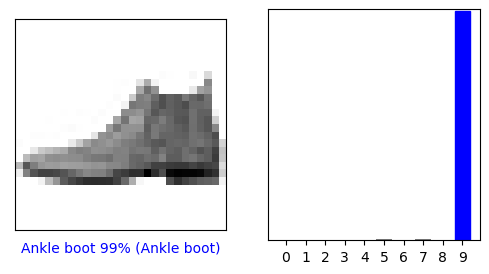

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

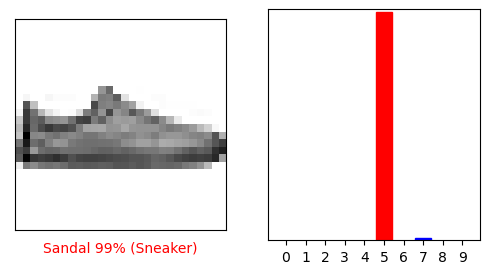

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

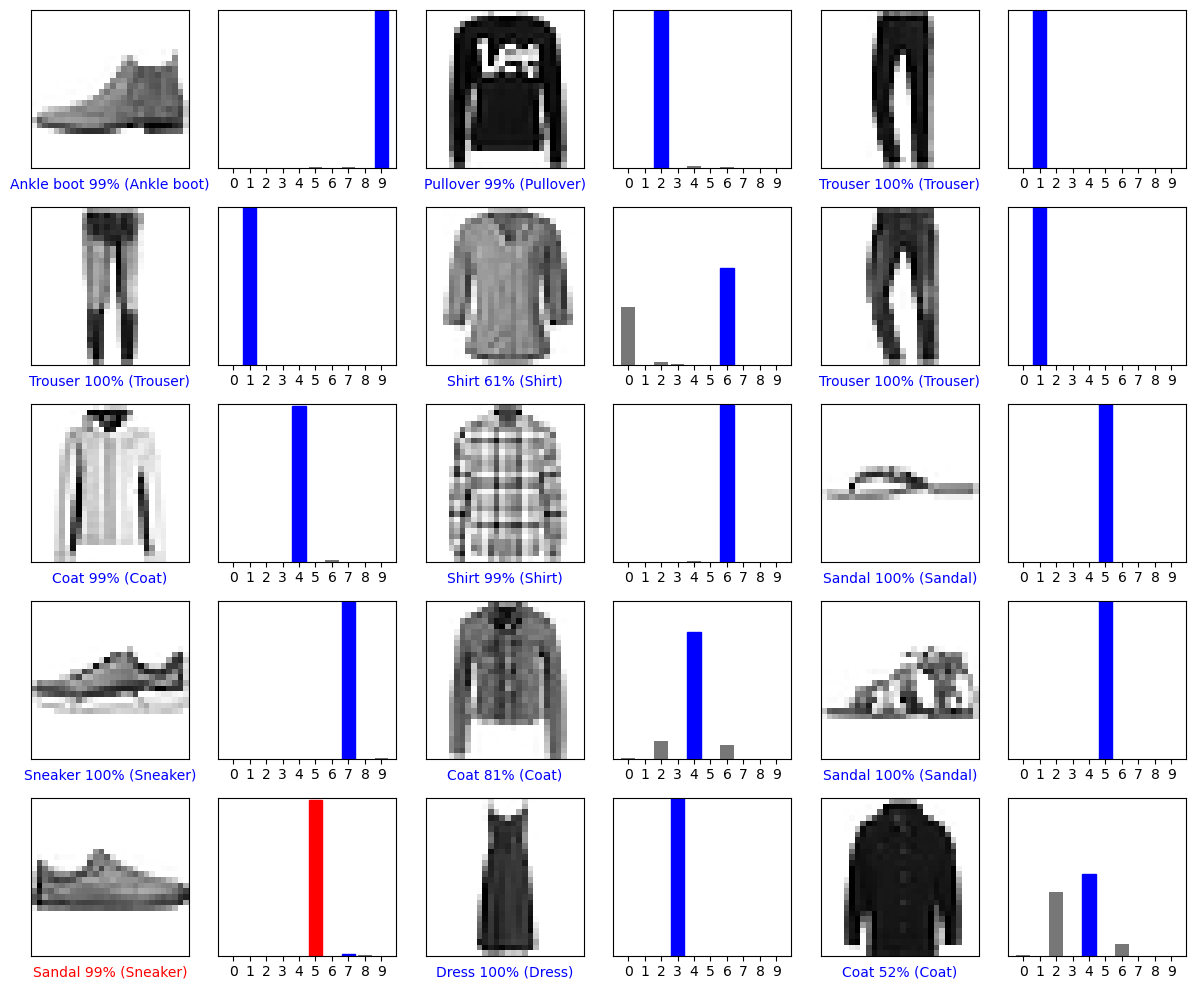

In [27]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [28]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [29]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [30]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 16ms/step
[[2.5921391e-04 1.7717471e-12 9.9077344e-01 9.1514818e-10 7.6863430e-03
  9.9291594e-14 1.2809705e-03 1.1959348e-16 6.2935557e-10 8.6923437e-13]]


[[3.0403002e-04 1.8616846e-13 9.9458426e-01 2.7902834e-07 1.9599060e-03
  1.3284789e-11 3.1515942e-03 3.1336544e-12 9.8705077e-10 1.1858555e-09]]


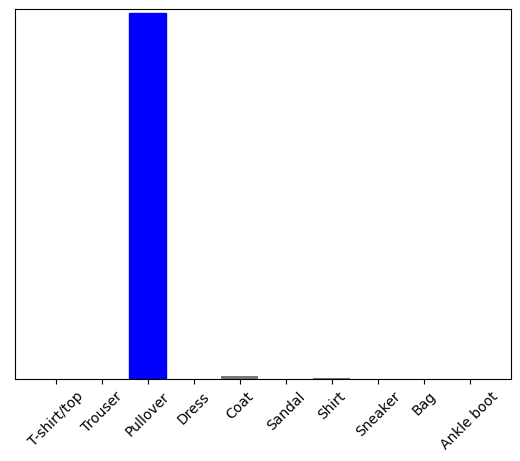

In [31]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [32]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected.

To learn more about building models with Keras, see the [Keras guides](https://www.tensorflow.org/guide/keras).